# 선형 회귀(Linear Regression): 경사 하강법(Gradient Descent)
---


### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 데이터 준비

In [2]:
# 3x + 6
X_train = np.array([1., 2., 3., 4., 5., 6.])
y_train = np.array([9., 12., 15., 18., 21., 24.])

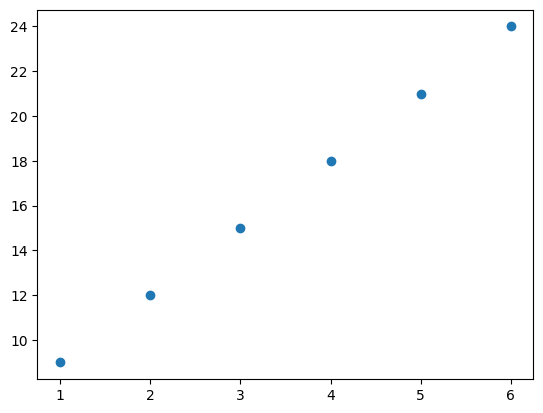

In [3]:
plt.scatter(X_train, y_train)
plt.show()

### 학습: 경사 하강법(Gradient Descent)

In [4]:
# MSE
W = 0.0
b = 0.0
N = len(X_train)

epochs = 5000
lr = 0.01

for i in range(epochs):
    # 가설
    h_hat = W * X_train + b
    # cost: mse
    cost = (np.sum(y_train - h_hat)**2) / N

    # 미분
    grad_W = np.sum((W * X_train + b - y_train) * 2 * X_train) / N
    grad_b = np.sum((W * X_train + b - y_train) * 2) / N

    W = W - lr * grad_W
    b = b - lr * grad_b
    
    if i % 200 == 0:
        print(f'Epochs: {i}, cost: {cost:10f}, W: {W:10f}, b: {b:10f}')

Epochs: 0, cost: 1633.500000, W:   1.330000, b:   0.330000
Epochs: 200, cost:   1.168692, W:   3.562892, b:   3.590147
Epochs: 400, cost:   0.270750, W:   3.270931, b:   4.840089
Epochs: 600, cost:   0.062724, W:   3.130405, b:   5.441712
Epochs: 800, cost:   0.014531, W:   3.062766, b:   5.731285
Epochs: 1000, cost:   0.003366, W:   3.030211, b:   5.870662
Epochs: 1200, cost:   0.000780, W:   3.014541, b:   5.937747
Epochs: 1400, cost:   0.000181, W:   3.006999, b:   5.970036
Epochs: 1600, cost:   0.000042, W:   3.003369, b:   5.985578
Epochs: 1800, cost:   0.000010, W:   3.001621, b:   5.993058
Epochs: 2000, cost:   0.000002, W:   3.000780, b:   5.996659
Epochs: 2200, cost:   0.000001, W:   3.000376, b:   5.998392
Epochs: 2400, cost:   0.000000, W:   3.000181, b:   5.999226
Epochs: 2600, cost:   0.000000, W:   3.000087, b:   5.999627
Epochs: 2800, cost:   0.000000, W:   3.000042, b:   5.999821
Epochs: 3000, cost:   0.000000, W:   3.000020, b:   5.999914
Epochs: 3200, cost:   0.000000

In [5]:
y_pred = 3.0 * X_train + 6.0
y_pred

array([ 9., 12., 15., 18., 21., 24.])

In [6]:
y_train

array([ 9., 12., 15., 18., 21., 24.])

### 클래스 정의: LinearRegressor

In [7]:
class LinearRegressor:
    def fit(self, X, y, epochs=100, lr=0.01):
        self.W_ = 0.0
        self.b_ = 0.0
        self.N_ = len(X)
        self.lr_ = lr

        for i in range(epochs):
            # 가설
            h_hat = self.W_ * X_train + self.b_
            # cost: mse
            cost = (np.sum(y - h_hat)**2) / self.N_

            # 미분
            grad_W = np.sum((self.W_*X + self.b_ - y)*2*X) / self.N_
            grad_b = np.sum((self.W_*X + self.b_ - y)*2) / self.N_

            self.W_ = self.W_ - self.lr_ * grad_W
            self.b_ = self.b_ - self.lr_ * grad_b
            
            if i % 200 == 0:
                print(f'Epochs: {i}, cost: {cost:10f}, W: {W:10f}, b: {b:10f}')

    def predict(self, X):
        return self.W_ * X + self.b_

### 학습

In [8]:
lr = LinearRegressor()
lr.fit(X_train, y_train, epochs=5000)

Epochs: 0, cost: 1633.500000, W:   3.000000, b:   6.000000
Epochs: 200, cost:   1.168692, W:   3.000000, b:   6.000000
Epochs: 400, cost:   0.270750, W:   3.000000, b:   6.000000
Epochs: 600, cost:   0.062724, W:   3.000000, b:   6.000000
Epochs: 800, cost:   0.014531, W:   3.000000, b:   6.000000
Epochs: 1000, cost:   0.003366, W:   3.000000, b:   6.000000
Epochs: 1200, cost:   0.000780, W:   3.000000, b:   6.000000
Epochs: 1400, cost:   0.000181, W:   3.000000, b:   6.000000
Epochs: 1600, cost:   0.000042, W:   3.000000, b:   6.000000
Epochs: 1800, cost:   0.000010, W:   3.000000, b:   6.000000
Epochs: 2000, cost:   0.000002, W:   3.000000, b:   6.000000
Epochs: 2200, cost:   0.000001, W:   3.000000, b:   6.000000
Epochs: 2400, cost:   0.000000, W:   3.000000, b:   6.000000
Epochs: 2600, cost:   0.000000, W:   3.000000, b:   6.000000
Epochs: 2800, cost:   0.000000, W:   3.000000, b:   6.000000
Epochs: 3000, cost:   0.000000, W:   3.000000, b:   6.000000
Epochs: 3200, cost:   0.000000

### 예측

In [9]:
X_test = np.array([10, 11])
y_pred = lr.predict(X_test)
y_pred

array([36.00000008, 39.00000009])